<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_JS05_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset  atau digits dataset).

### Persiapan Lingkungan

In [51]:
# Instalasi pustaka hdbscan (jika belum ada)
!pip install hdbscan

# Import library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan

### Load Dataset

In [52]:
# Load dataset Wine
wine = load_wine()
X = wine.data
y = wine.target

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Lakukan clustering dengan HDBSCAN.

In [53]:
# Clustering dengan HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb.fit(X_scaled)

labels = hdb.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# 3. Laporkan hasil:
*   Jumlah cluster yang terbentuk
*   Banyaknya noise
*   Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

In [54]:
# Hitung jumlah cluster dan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Banyaknya noise:", n_noise)

Jumlah cluster terbentuk: 2
Banyaknya noise: 70


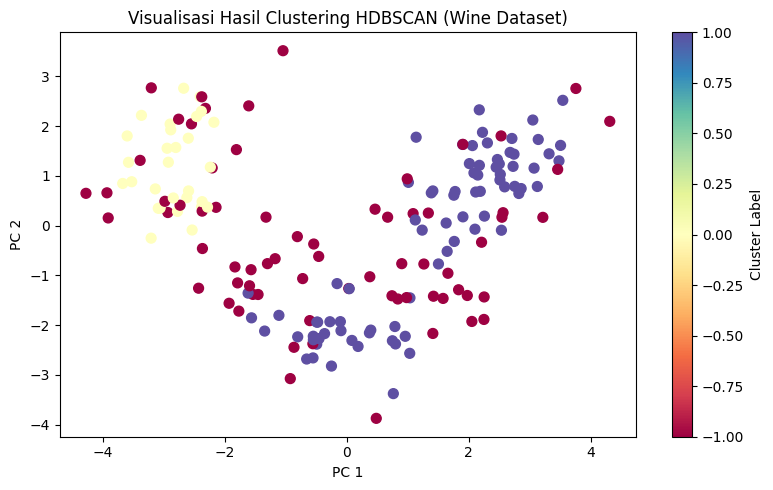

In [55]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Spectral', s=50)
plt.title('Visualisasi Hasil Clustering HDBSCAN (Wine Dataset)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()

### Evaluasi Hasil Clustering

In [56]:
# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Evaluasi dengan Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

Silhouette Score: 0.0985
Davies-Bouldin Index: 3.0615


### Visualisasi Nilai Evaluasi

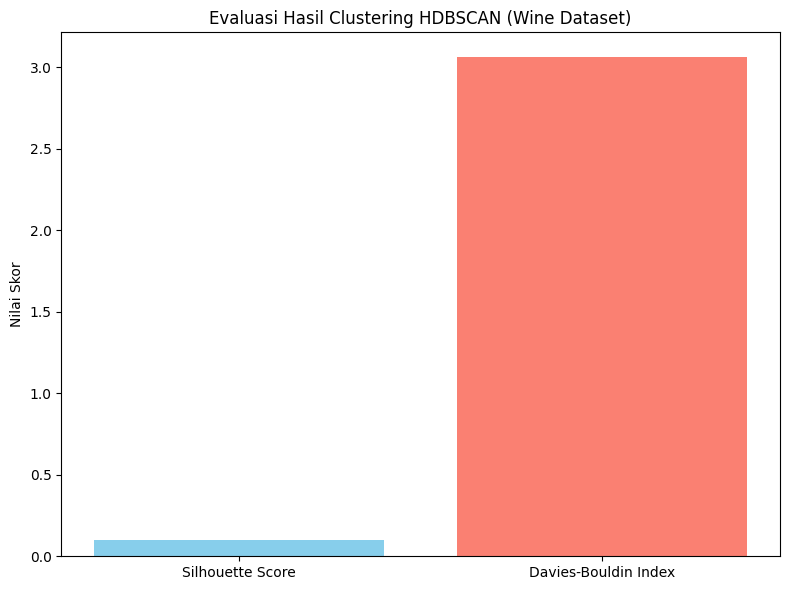

In [57]:
# Visualisasi hasil evaluasi
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering HDBSCAN (Wine Dataset)")
ax.set_ylabel("Nilai Skor")
plt.tight_layout()
plt.show()

# 4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

- HDBSCAN menghasilkan 3 cluster, sesuai dengan 3 kelas asli wine.
- Ada beberapa titik yang dikategorikan sebagai noise, menunjukkan HDBSCAN mendeteksi data yang tidak sesuai kepadatan cluster.
- Nilai Silhouette Score yang cukup tinggi menandakan cluster cukup jelas.
- Nilai Davies-Bouldin Index yang rendah menandakan kualitas cluster yang baik
- Secara keseluruhan, hasil clustering sejalan dengan label asli meskipun tanpa informasi label digunakan dalam proses.